**Data-Driven Predictive Analysis for Brain Stroke Risk Assessment**

**AC Janasivaguru**

**Master of Science in Data Science**
**Liverpool John Moore’s University**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv('brain_stroke.csv')
df.head()


gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [4]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
# Columns to encode
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Dictionary to store mappings
mapping_dicts = {}

# Apply mappings
for col in cat_cols:
    unique_vals = df[col].unique()
    mapping = {val: i+1 for i, val in enumerate(unique_vals)}
    df[col] = df[col].map(mapping)
    mapping_dicts[col] = mapping

# Show all mappings
mapping_dicts


{'gender': {'Male': 1, 'Female': 2},
 'ever_married': {'Yes': 1, 'No': 2},
 'work_type': {'Private': 1, 'Self-employed': 2, 'Govt_job': 3, 'children': 4},
 'Residence_type': {'Urban': 1, 'Rural': 2},
 'smoking_status': {'formerly smoked': 1,
  'never smoked': 2,
  'smokes': 3,
  'Unknown': 4}}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [ ]:
#EDA Before Doing SMOTE(Data balancing)

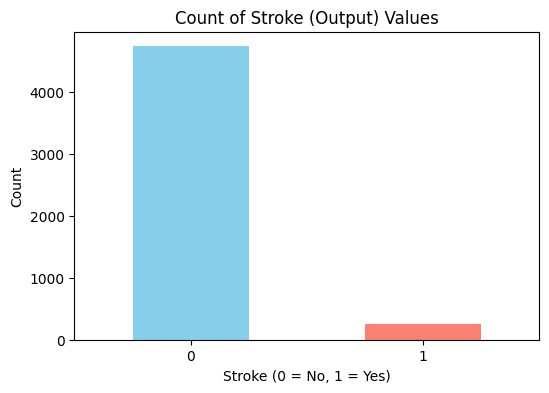

In [6]:
import matplotlib.pyplot as plt

# Using df as your DataFrame
stroke_counts = df['stroke'].value_counts()

plt.figure(figsize=(6,4))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Stroke (Output) Values')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


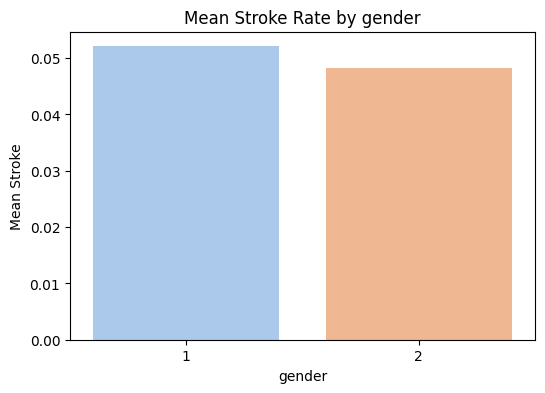

<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


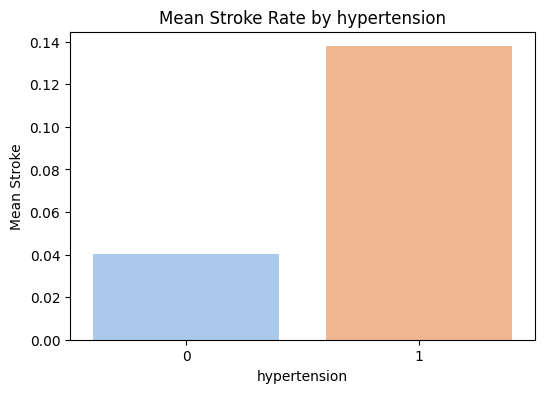

<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


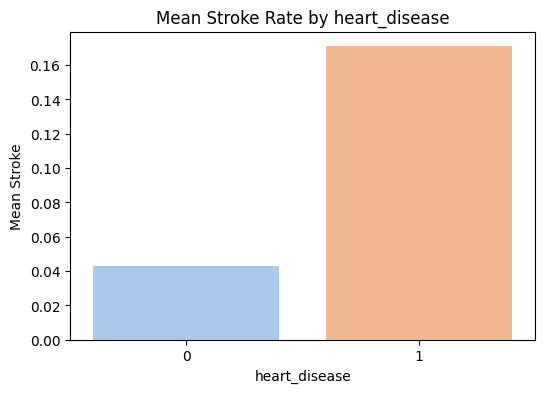

<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


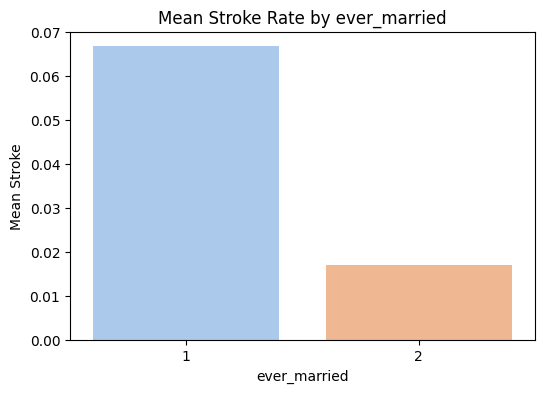

<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


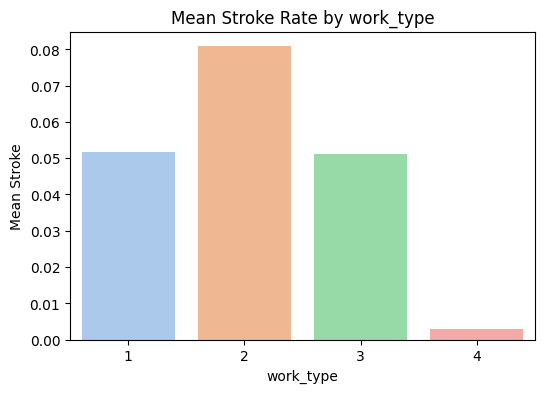

<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


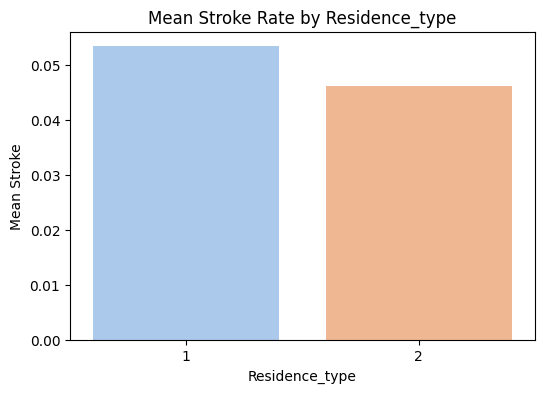

<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-7-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


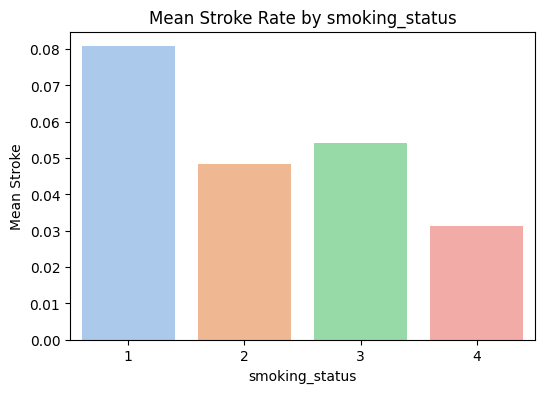

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

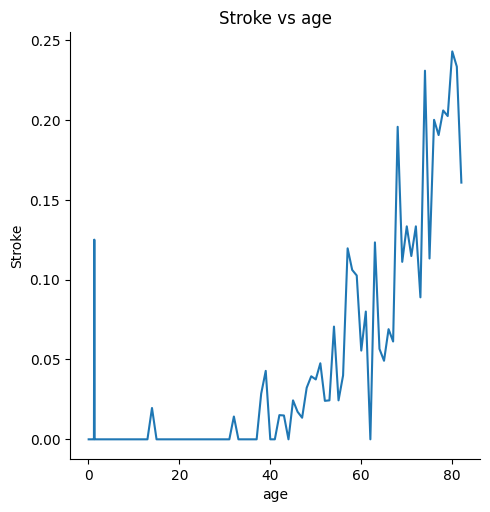

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

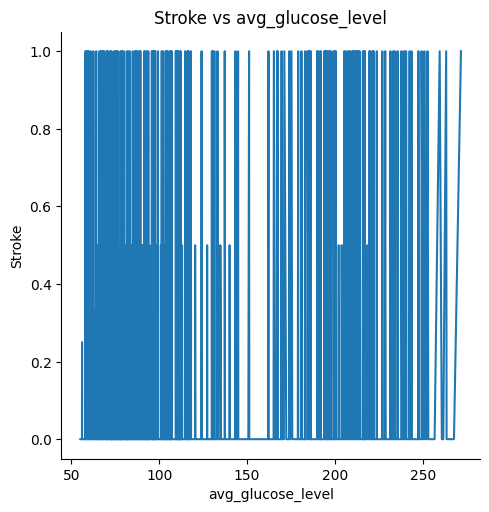

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

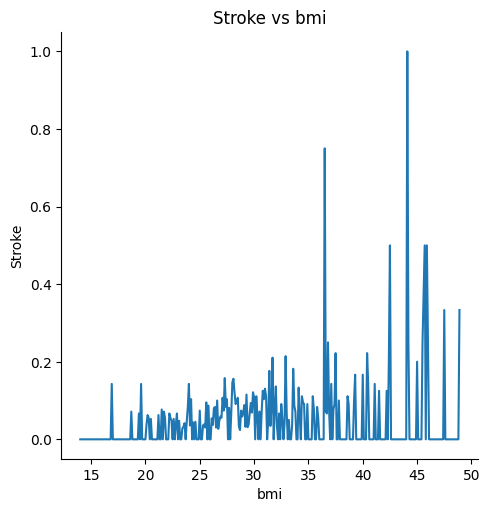

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your categorical columns (encoded as int)
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Your numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Plot barplots for categorical columns (mean stroke by category)
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
    plt.title(f'Mean Stroke Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Stroke')
    plt.show()

# Plot line relplots for numerical columns (stroke vs numerical feature)
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.relplot(x=col, y='stroke', kind='line', data=df, ci=None)
    plt.title(f'Stroke vs {col}')
    plt.xlabel(col)
    plt.ylabel('Stroke')
    plt.show()


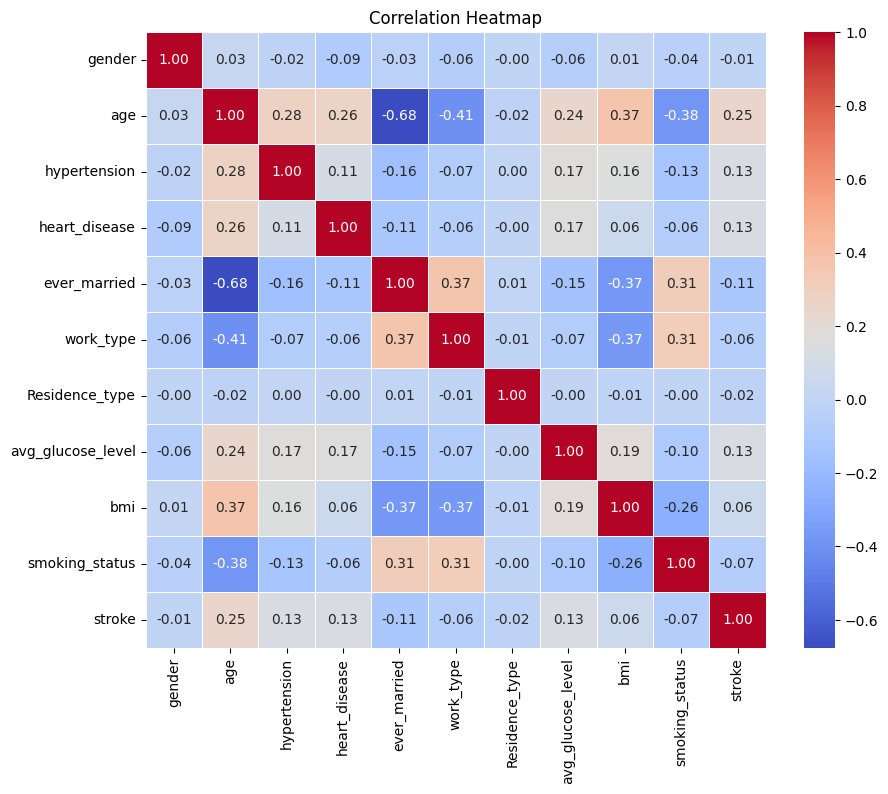

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-8-02b88a3d746e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set2')


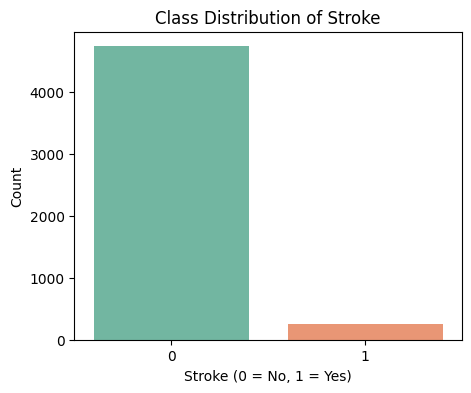

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title('Class Distribution of Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


<ipython-input-9-571a959e2df5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set3')


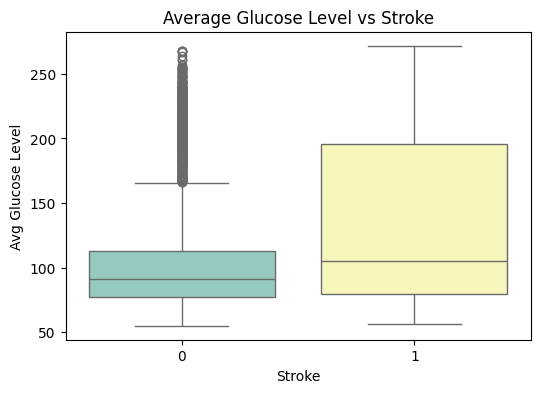

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set3')
plt.title('Average Glucose Level vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Avg Glucose Level')
plt.show()


<ipython-input-10-a32e1379f667>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='bmi', data=df, palette='muted')


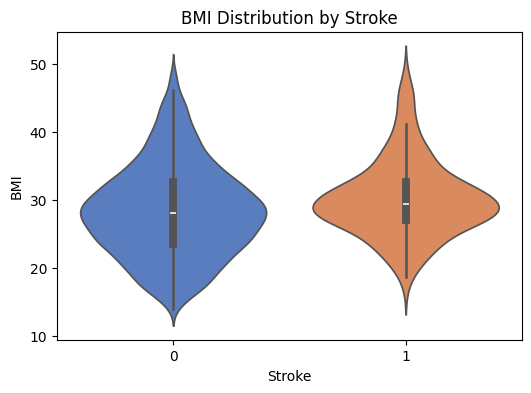

In [10]:
plt.figure(figsize=(6,4))
sns.violinplot(x='stroke', y='bmi', data=df, palette='muted')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()


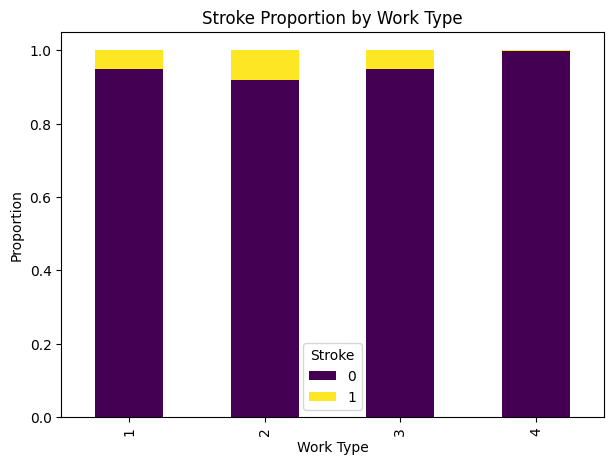

In [ ]:
work_stroke = pd.crosstab(df['work_type'], df['stroke'], normalize='index')
work_stroke.plot(kind='bar', stacked=True, colormap='viridis', figsize=(7,5))
plt.title('Stroke Proportion by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Proportion')
plt.legend(title='Stroke')
plt.show()


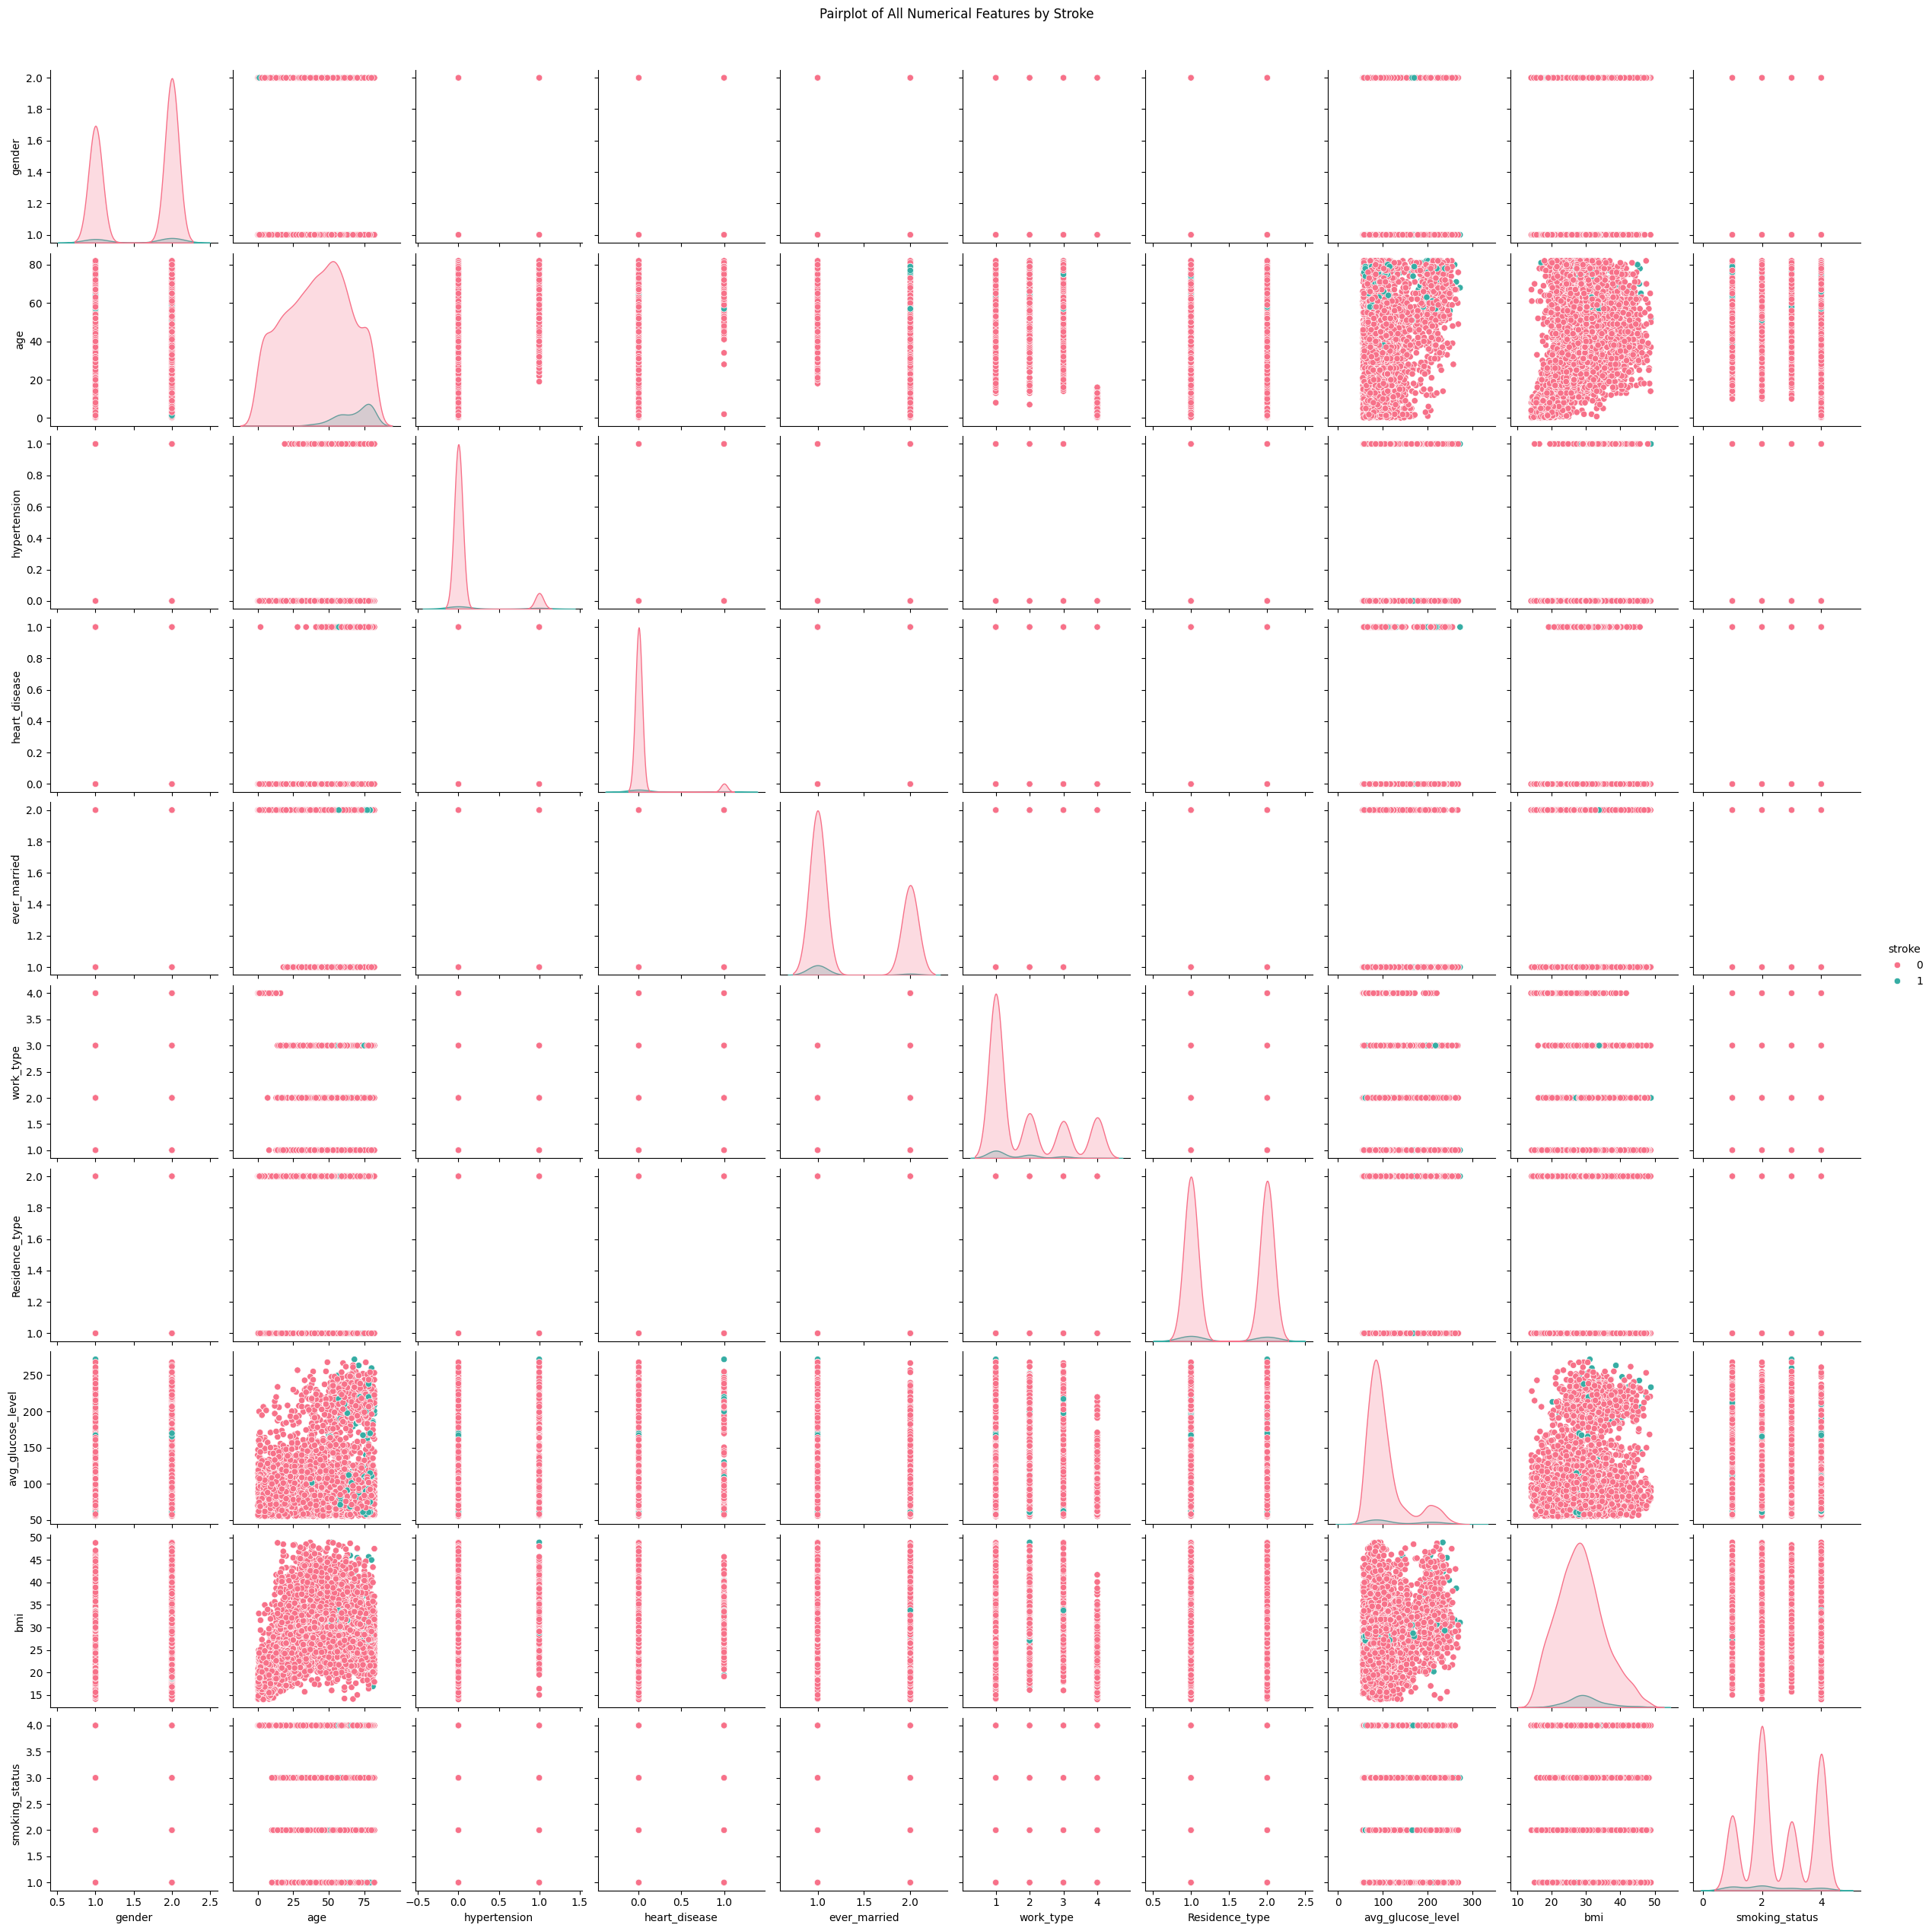

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select all numerical columns except the target ('stroke')
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Optional: Remove the target column from the list to avoid plotting it as a feature
numeric_cols.remove('stroke')

# Plot the pairplot
sns.pairplot(df, vars=numeric_cols, hue='stroke', palette='husl')
plt.suptitle('Pairplot of All Numerical Features by Stroke', y=1.02)
plt.show()


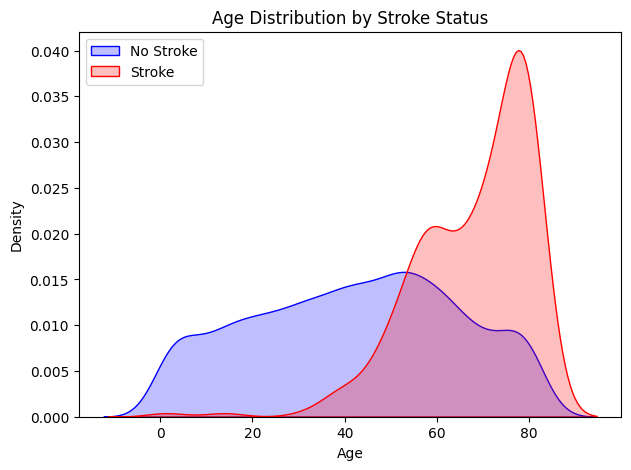

In [12]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df[df['stroke'] == 0], x='age', fill=True, label='No Stroke', color='blue')
sns.kdeplot(data=df[df['stroke'] == 1], x='age', fill=True, label='Stroke', color='red')
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


<ipython-input-13-81372d77d284>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFE_Rank', y='Feature', data=ranking_df, palette='viridis')


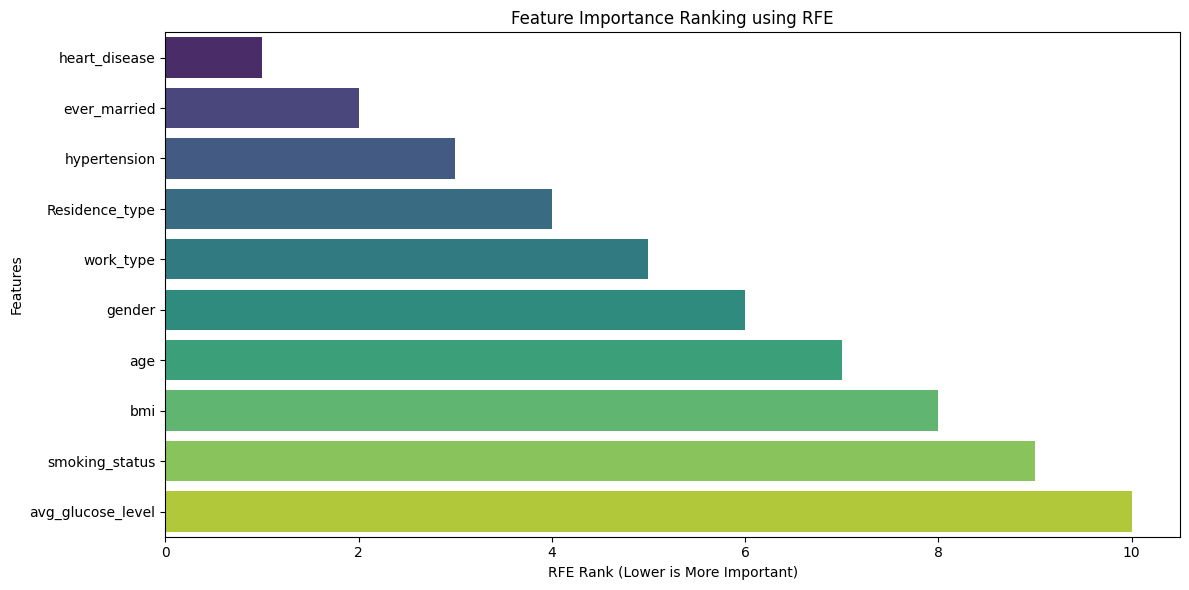

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Drop rows with missing values (if not already done)
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Encode categorical features to numeric
#X = pd.get_dummies(X, drop_first=True)

# Use Logistic Regression as the estimator for RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=1)  # We rank all features
rfe.fit(X, y)

# Create a DataFrame with feature names and their ranking (lower is more important)
ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'RFE_Rank': rfe.ranking_
}).sort_values(by='RFE_Rank')

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='RFE_Rank', y='Feature', data=ranking_df, palette='viridis')
plt.title('Feature Importance Ranking using RFE')
plt.xlabel('RFE Rank (Lower is More Important)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


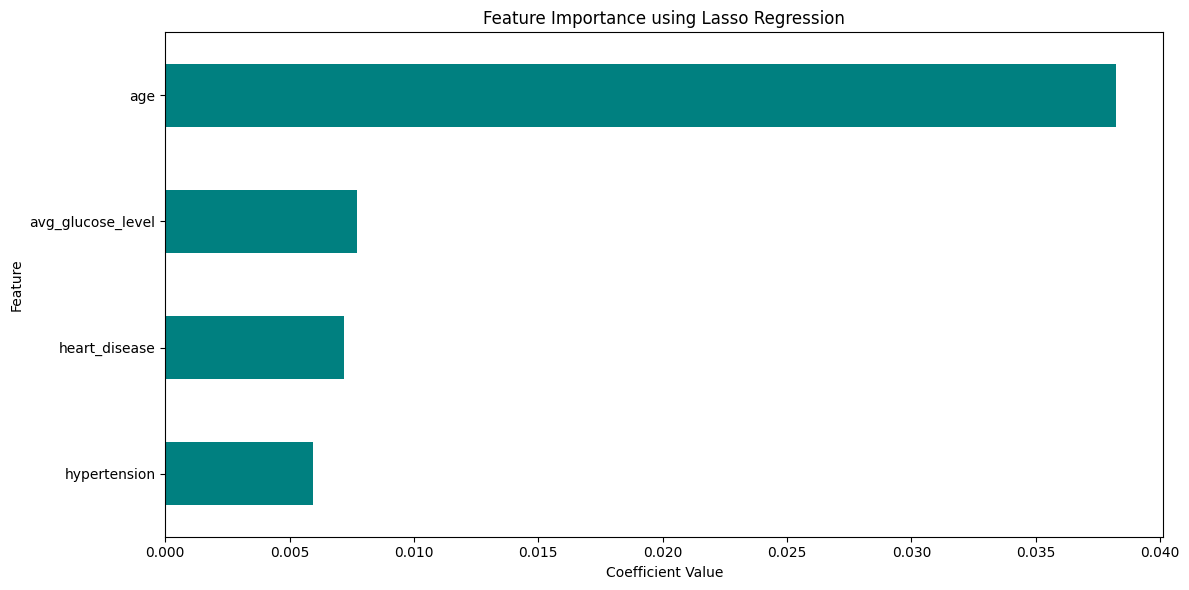

In [14]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Drop missing values if not already done
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Standardize features (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)  # You can tune alpha to control regularization
lasso.fit(X_scaled, y)

# Get feature importance (coefficients)
importance = pd.Series(lasso.coef_, index=X.columns)

# Plot non-zero coefficients (important features)
plt.figure(figsize=(12, 6))
importance[importance != 0].sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance using Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


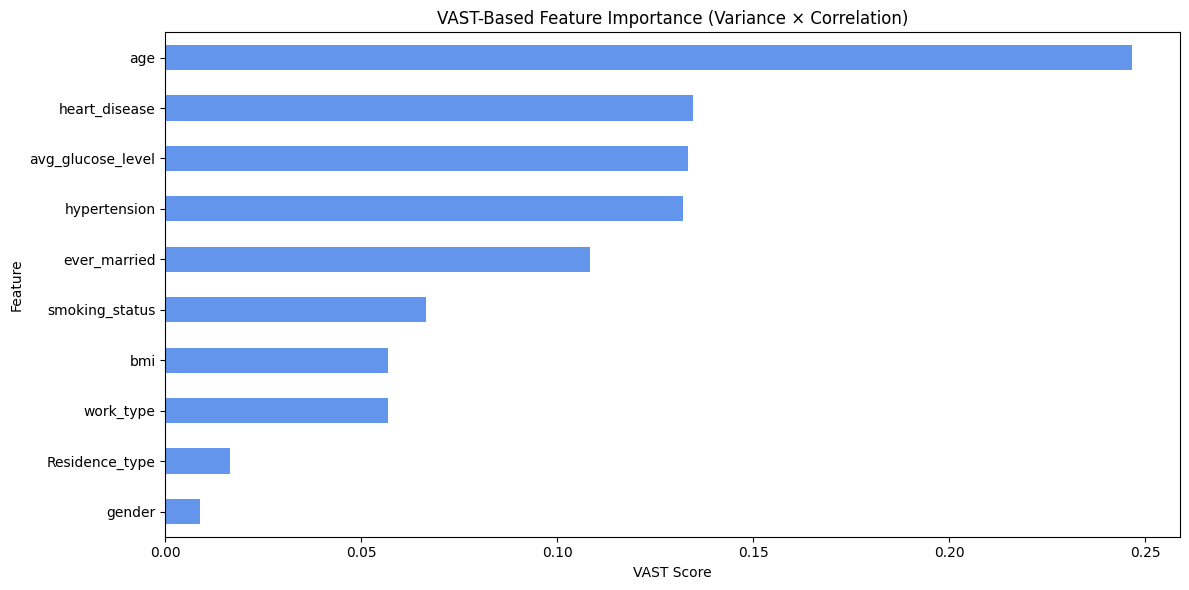

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values if not already done
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 1: Standardize features (mean=0, std=1)
X_standardized = (X_encoded - X_encoded.mean()) / X_encoded.std()

# Step 2: Compute variance of each feature
variance = X_standardized.var()

# Step 3: Compute absolute correlation with the target
correlation = X_encoded.corrwith(y).abs()

# Step 4: Compute VAST score = variance × correlation
vast_score = variance * correlation

# Step 5: Plot VAST importance
plt.figure(figsize=(12, 6))
vast_score.sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.title('VAST-Based Feature Importance (Variance × Correlation)')
plt.xlabel('VAST Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
#analyse the outliers

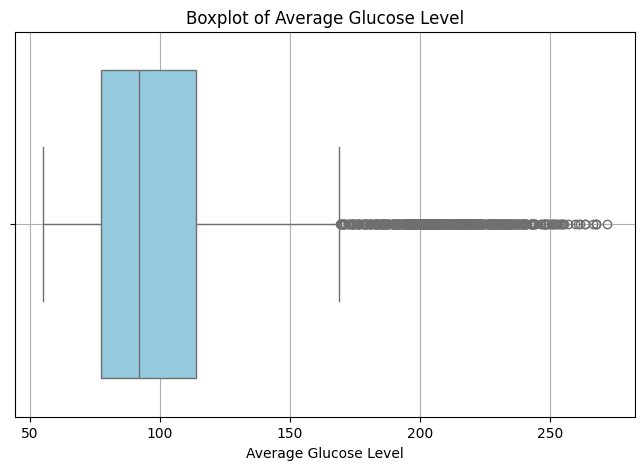

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df and it's already loaded
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['avg_glucose_level'], color='skyblue')
plt.title('Boxplot of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.grid(True)
plt.show()


In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['avg_glucose_level'] >= lower_bound) & (df['avg_glucose_level'] <= upper_bound)]

# Show confirmation
print("Outliers removed. Updated shape of df:", df.shape)


Outliers removed. Updated shape of df: (4379, 11)


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [19]:



# Drop rows with missing values (optional but common for SMOTE to work properly)
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Convert categorical features to numeric (SMOTE needs numerical input)
#X_encoded = pd.get_dummies(X, drop_first=True)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Combine back into a new balanced DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)

# Show class distribution
print(df_resampled['stroke'].value_counts())


stroke
1    4214
0    4214
Name: count, dtype: int64


In [20]:
df_resampled.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  80.0             0              1             1          1   
1       1  74.0             1              1             1          1   
2       2  69.0             0              0             2          1   
3       2  78.0             0              0             1          1   
4       2  81.0             1              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               2             105.92  32.5               2       1  
1               2              70.09  27.4               2       1  
2               1              94.39  22.8               2       1  
3               1              58.57  24.2               4       1  
4               2              80.43  29.7               2       1

In [21]:
df=df_resampled.copy()

In [22]:
df_resampled.to_csv("dataset2.csv")

In [23]:
#AFter SMOTE BAlancing EDA

<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


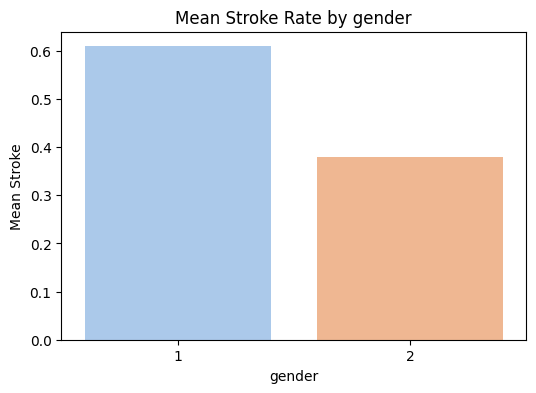

<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


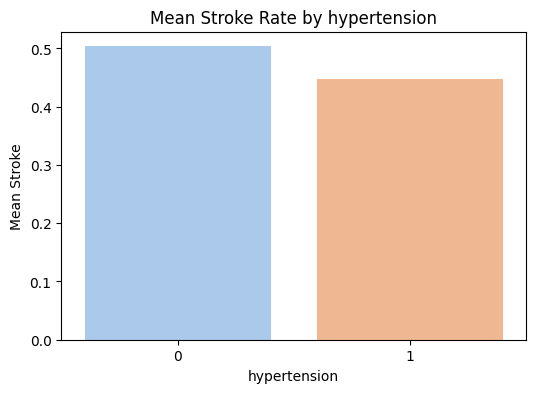

<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


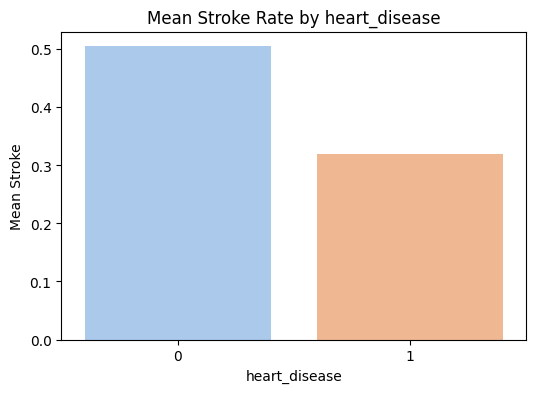

<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


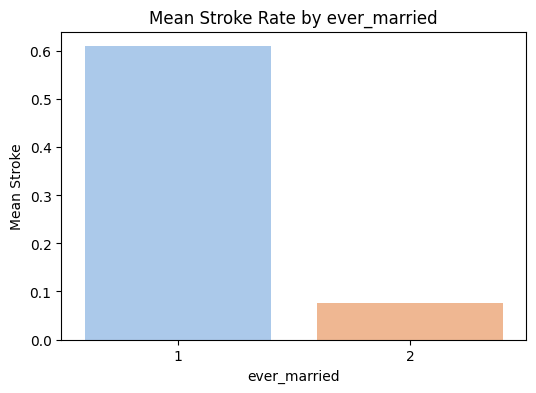

<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


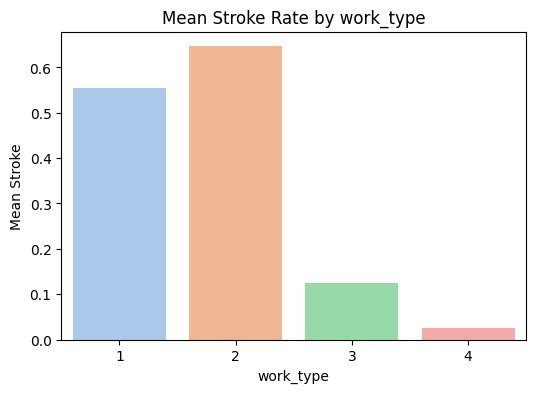

<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


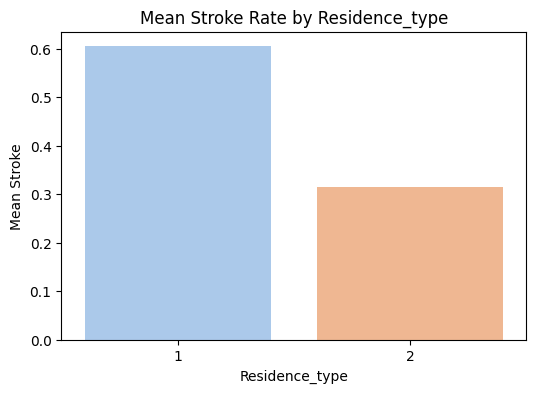

<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
<ipython-input-24-dced65d5b62f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')


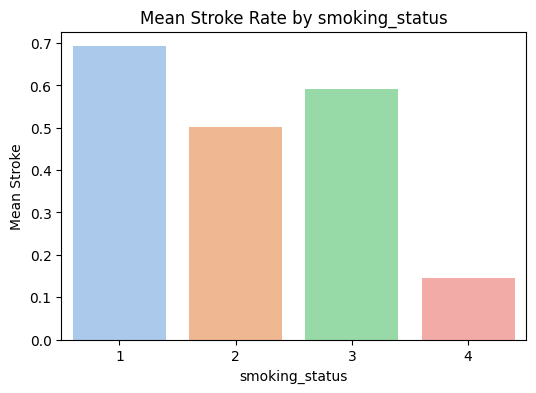

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

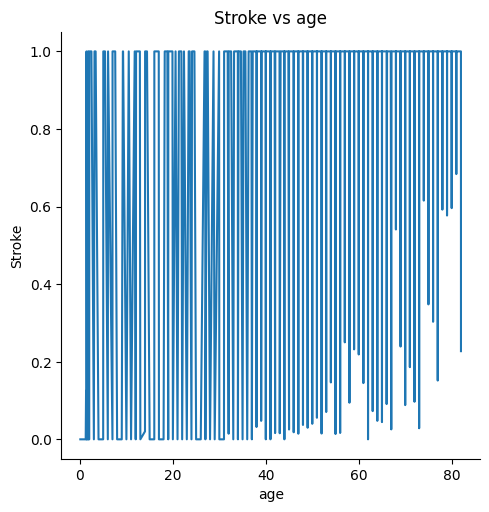

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

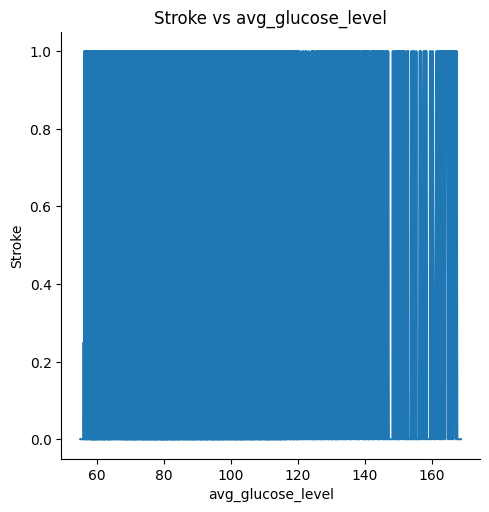

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

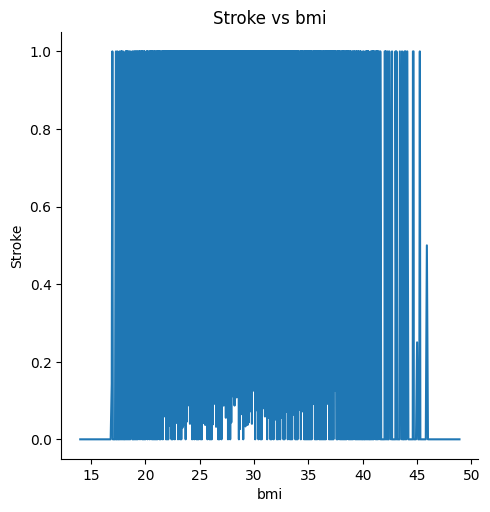

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your categorical columns (encoded as int)
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Your numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Plot barplots for categorical columns (mean stroke by category)
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='stroke', data=df, ci=None, palette='pastel')
    plt.title(f'Mean Stroke Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Stroke')
    plt.show()

# Plot line relplots for numerical columns (stroke vs numerical feature)
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.relplot(x=col, y='stroke', kind='line', data=df, ci=None)
    plt.title(f'Stroke vs {col}')
    plt.xlabel(col)
    plt.ylabel('Stroke')
    plt.show()


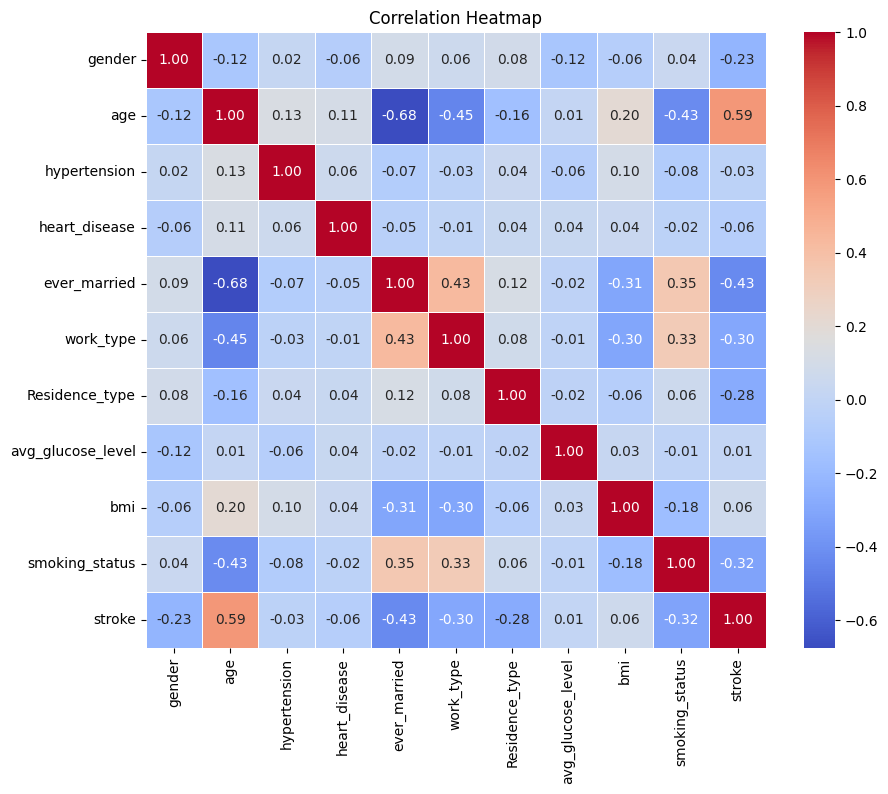

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-26-02b88a3d746e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set2')


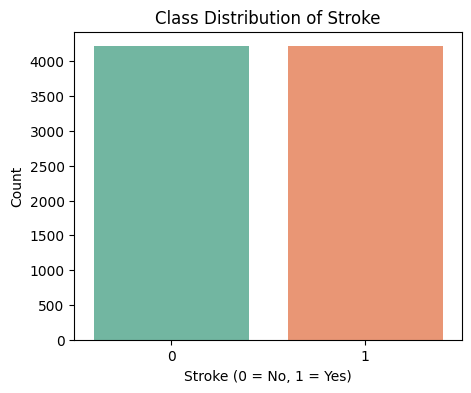

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title('Class Distribution of Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


<ipython-input-27-571a959e2df5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set3')


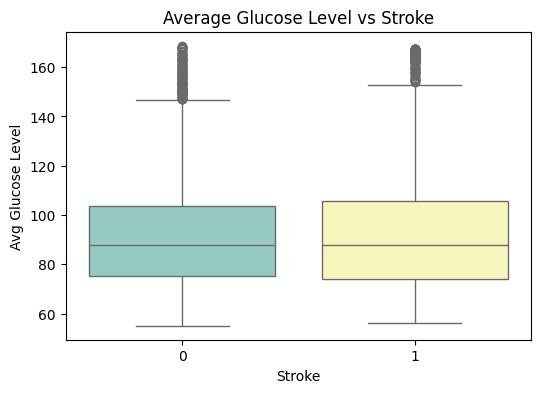

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set3')
plt.title('Average Glucose Level vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Avg Glucose Level')
plt.show()


<ipython-input-28-a32e1379f667>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='bmi', data=df, palette='muted')


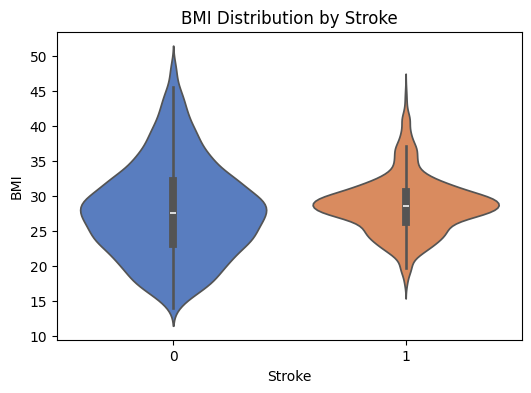

In [28]:
plt.figure(figsize=(6,4))
sns.violinplot(x='stroke', y='bmi', data=df, palette='muted')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()


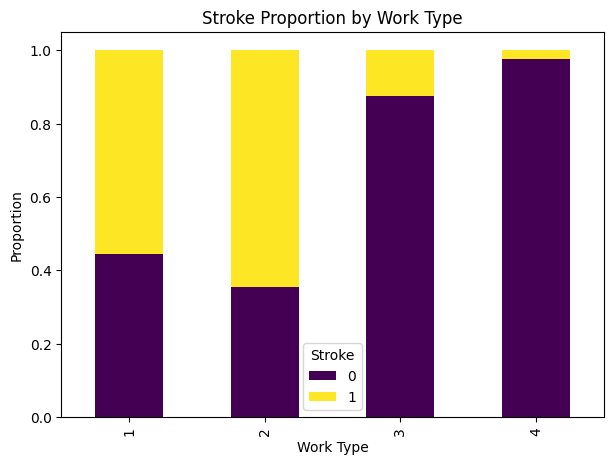

In [29]:
work_stroke = pd.crosstab(df['work_type'], df['stroke'], normalize='index')
work_stroke.plot(kind='bar', stacked=True, colormap='viridis', figsize=(7,5))
plt.title('Stroke Proportion by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Proportion')
plt.legend(title='Stroke')
plt.show()


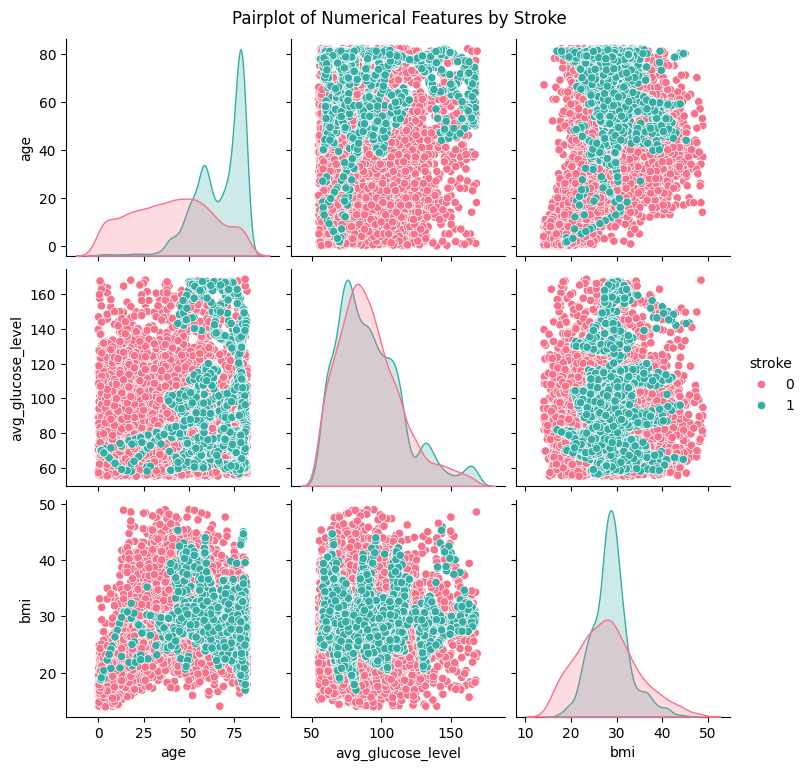

In [30]:
sns.pairplot(df, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke', palette='husl')
plt.suptitle('Pairplot of Numerical Features by Stroke', y=1.02)
plt.show()


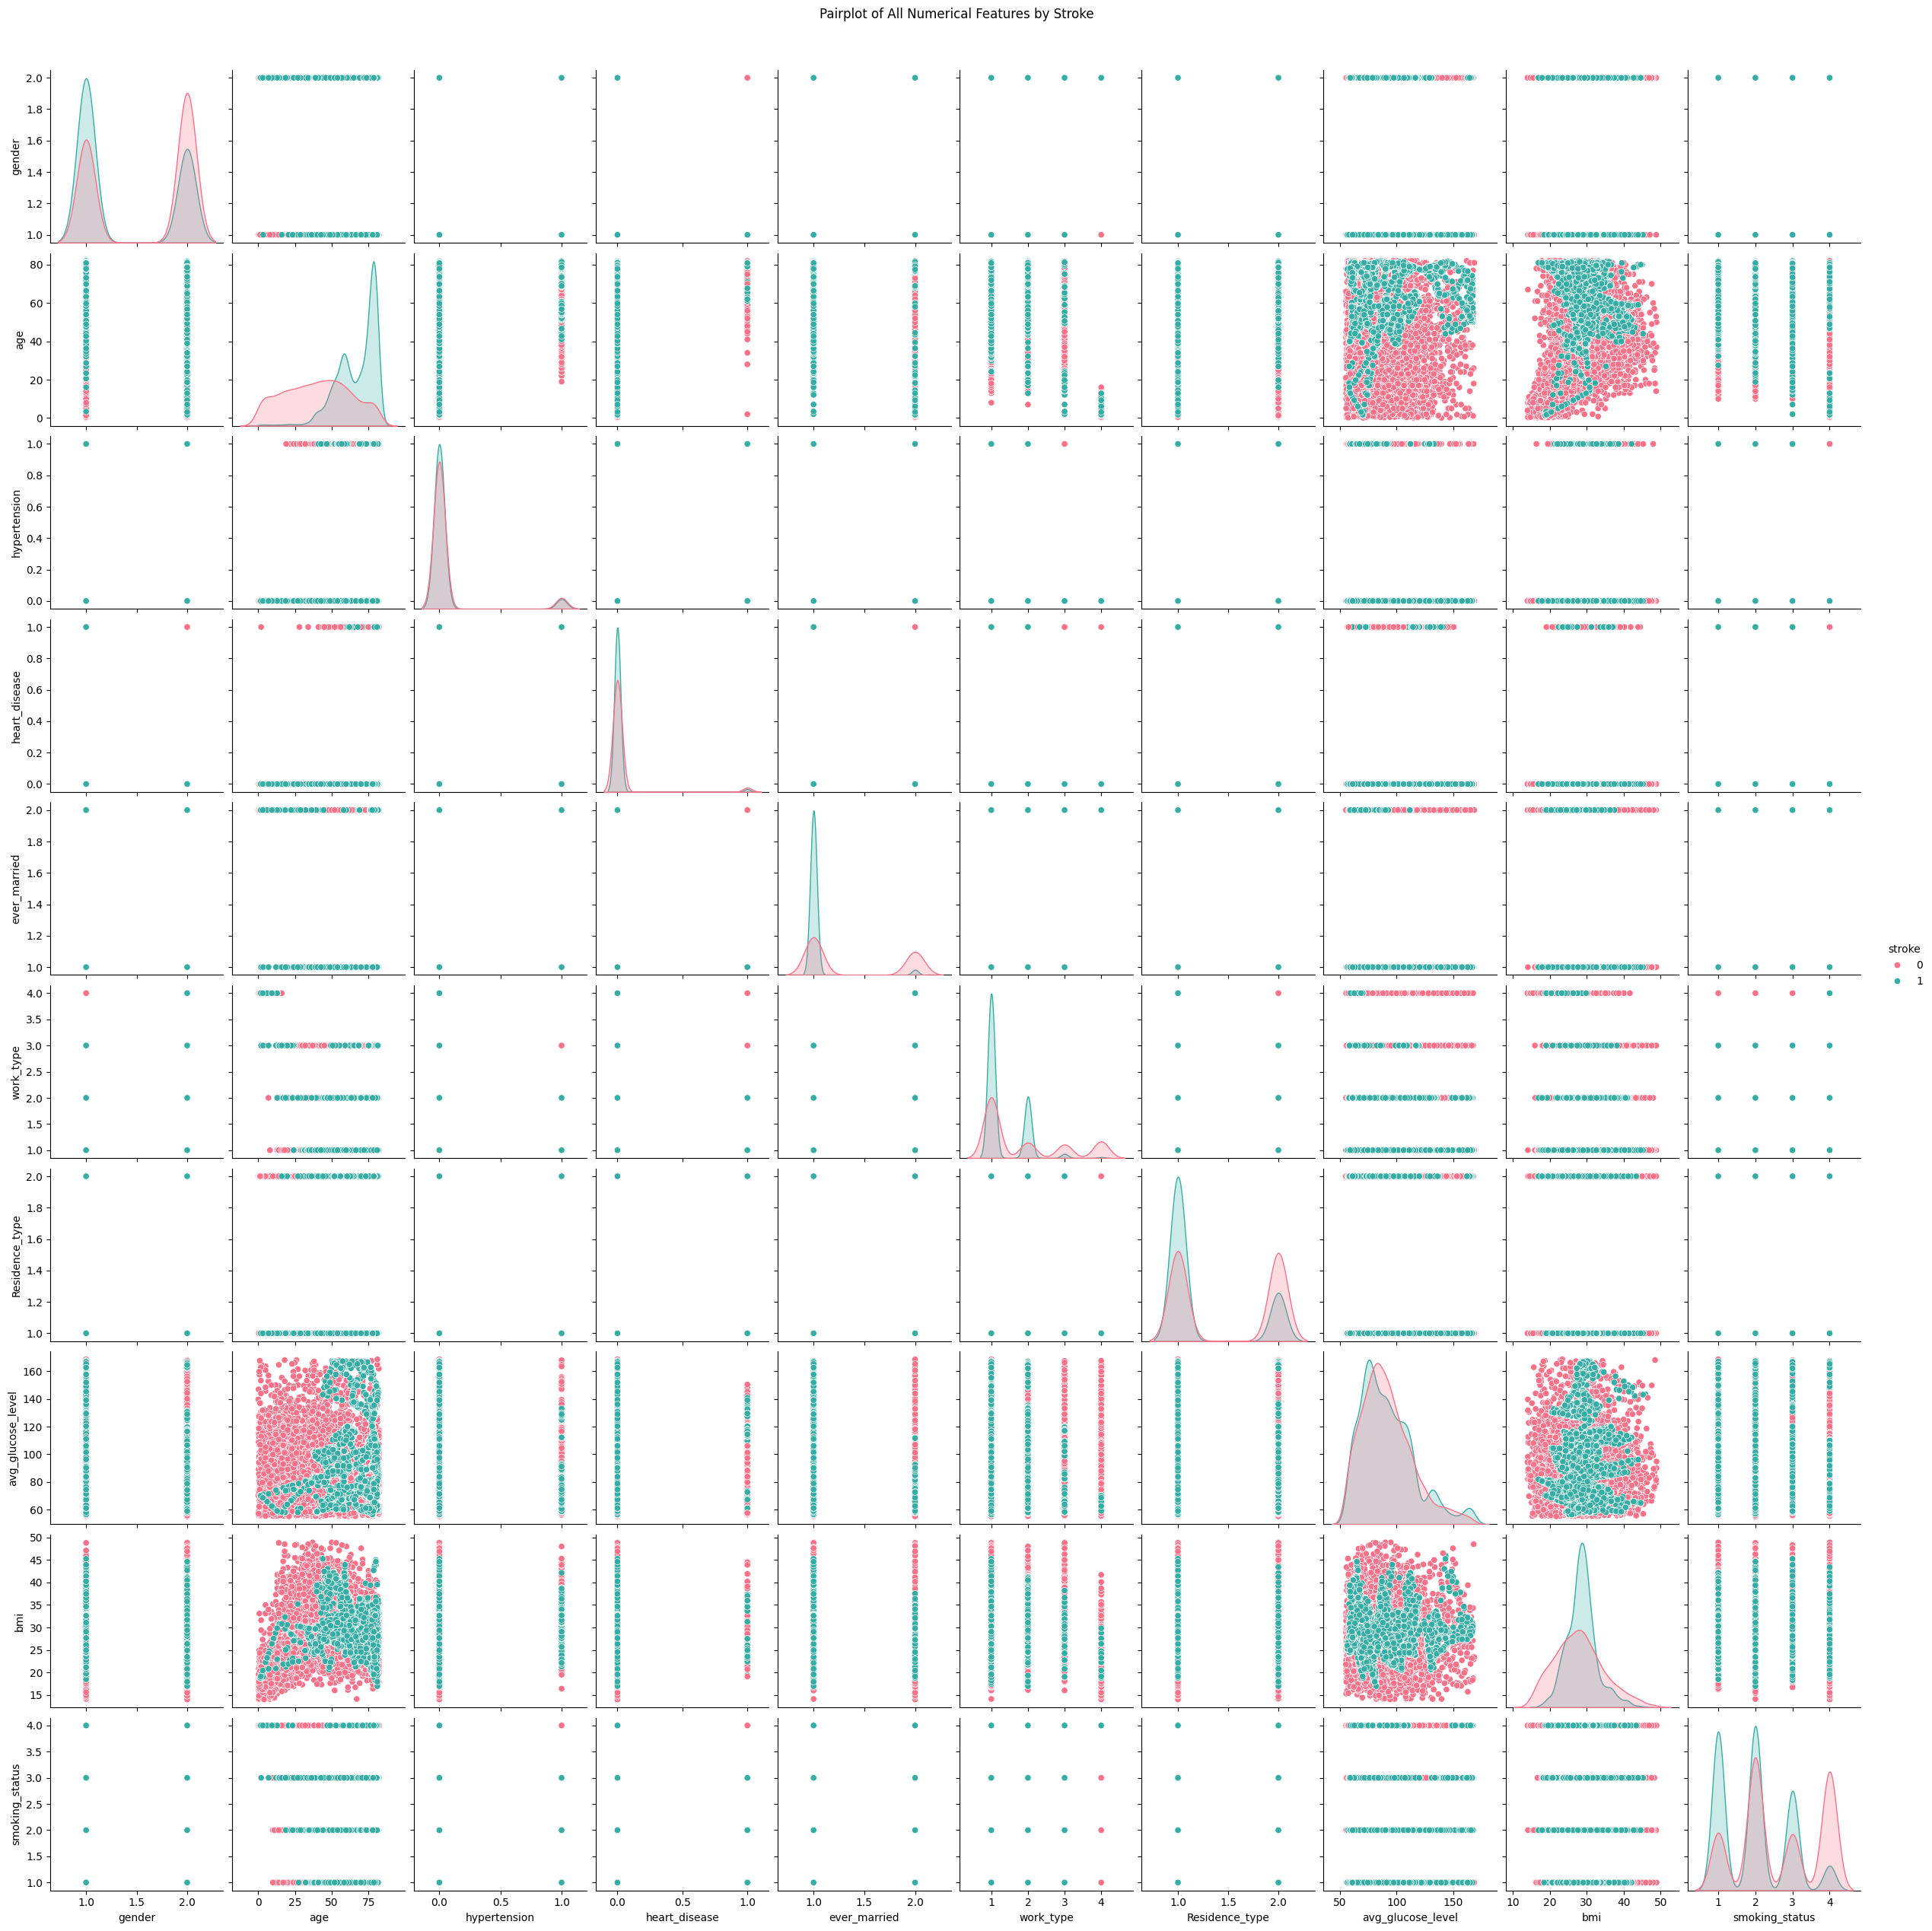

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select all numerical columns except the target ('stroke')
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Optional: Remove the target column from the list to avoid plotting it as a feature
numeric_cols.remove('stroke')

# Plot the pairplot
sns.pairplot(df, vars=numeric_cols, hue='stroke', palette='husl')
plt.suptitle('Pairplot of All Numerical Features by Stroke', y=1.02)
plt.show()


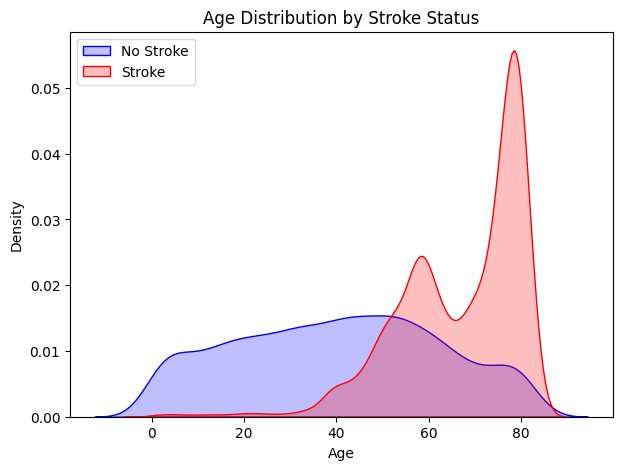

In [32]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df[df['stroke'] == 0], x='age', fill=True, label='No Stroke', color='blue')
sns.kdeplot(data=df[df['stroke'] == 1], x='age', fill=True, label='Stroke', color='red')
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


<ipython-input-33-81372d77d284>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFE_Rank', y='Feature', data=ranking_df, palette='viridis')


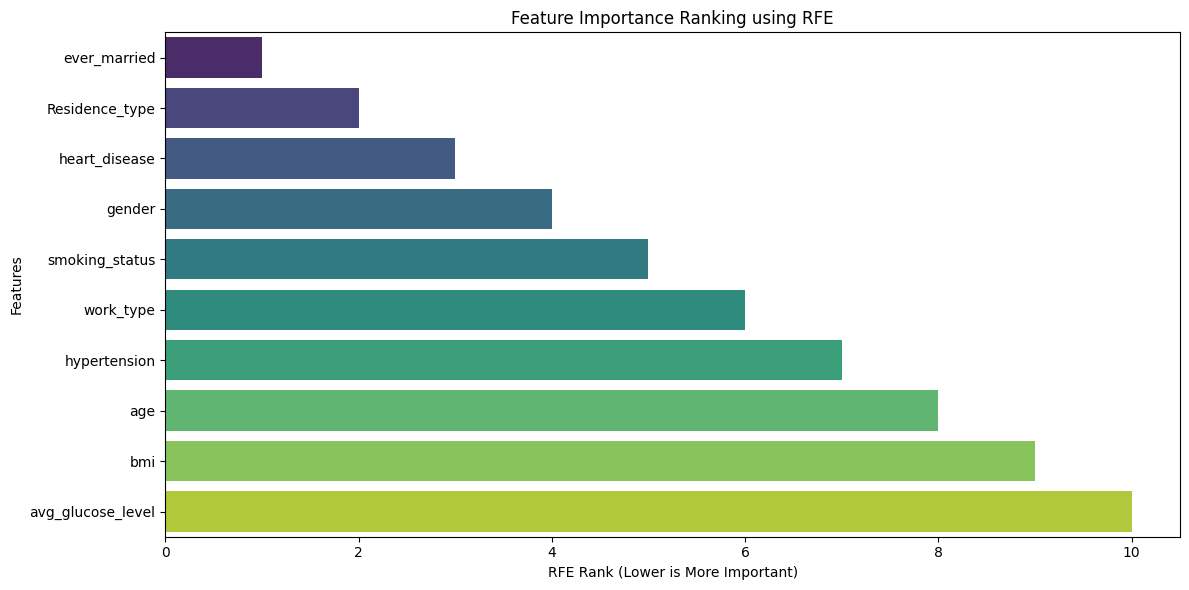

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Drop rows with missing values (if not already done)
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Encode categorical features to numeric
#X = pd.get_dummies(X, drop_first=True)

# Use Logistic Regression as the estimator for RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=1)  # We rank all features
rfe.fit(X, y)

# Create a DataFrame with feature names and their ranking (lower is more important)
ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'RFE_Rank': rfe.ranking_
}).sort_values(by='RFE_Rank')

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='RFE_Rank', y='Feature', data=ranking_df, palette='viridis')
plt.title('Feature Importance Ranking using RFE')
plt.xlabel('RFE Rank (Lower is More Important)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


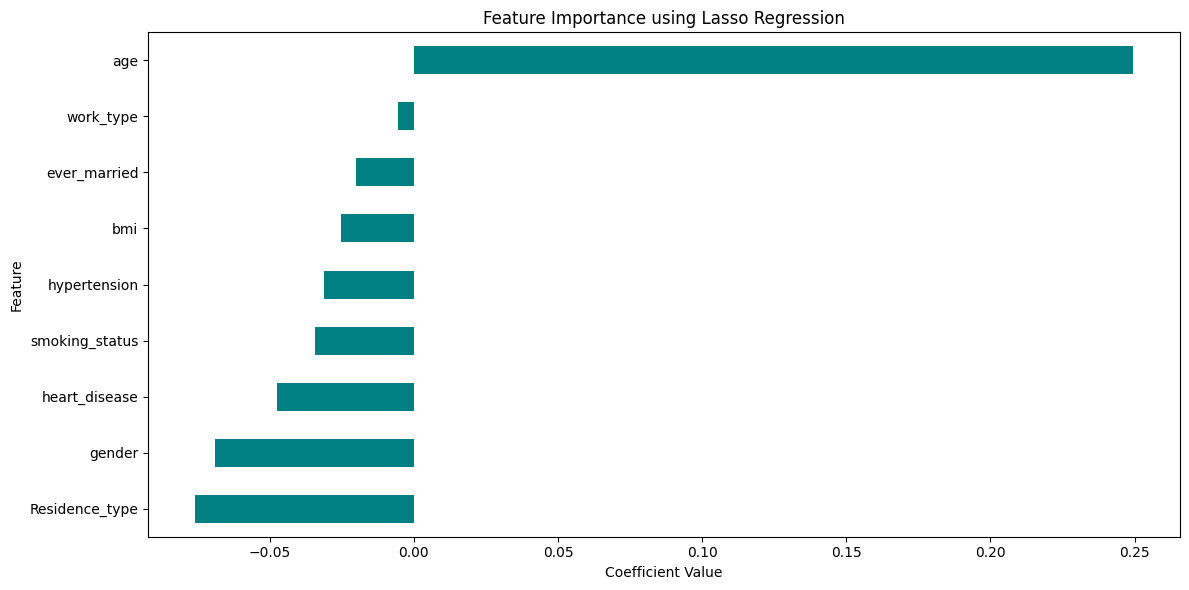

In [34]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Drop missing values if not already done
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Standardize features (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)  # You can tune alpha to control regularization
lasso.fit(X_scaled, y)

# Get feature importance (coefficients)
importance = pd.Series(lasso.coef_, index=X.columns)

# Plot non-zero coefficients (important features)
plt.figure(figsize=(12, 6))
importance[importance != 0].sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance using Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


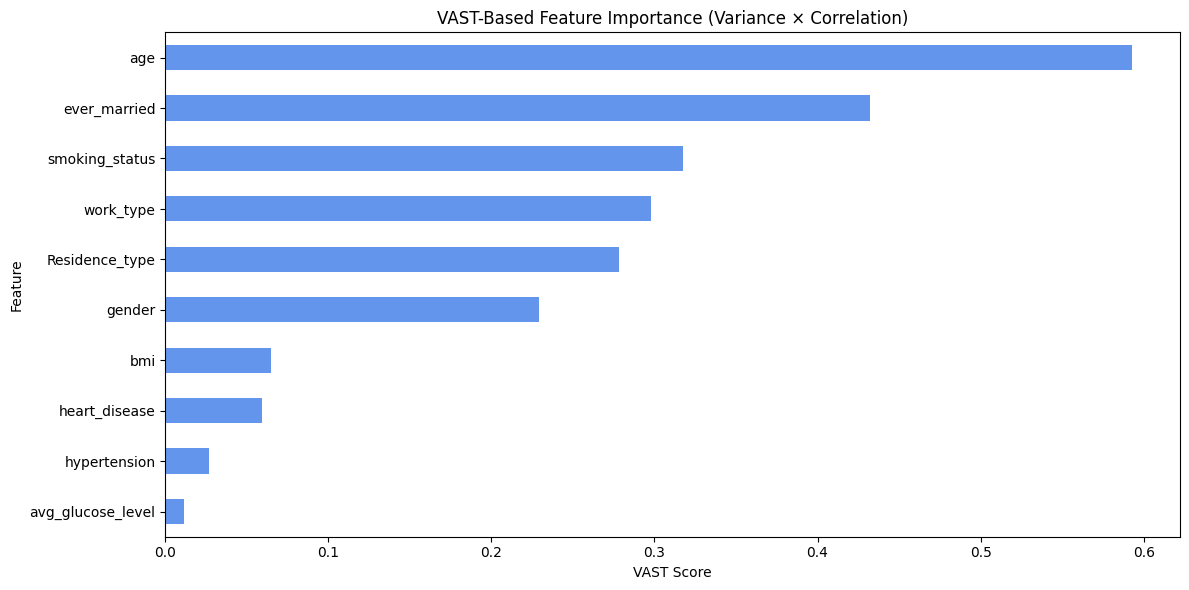

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values if not already done
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 1: Standardize features (mean=0, std=1)
X_standardized = (X_encoded - X_encoded.mean()) / X_encoded.std()

# Step 2: Compute variance of each feature
variance = X_standardized.var()

# Step 3: Compute absolute correlation with the target
correlation = X_encoded.corrwith(y).abs()

# Step 4: Compute VAST score = variance × correlation
vast_score = variance * correlation

# Step 5: Plot VAST importance
plt.figure(figsize=(12, 6))
vast_score.sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.title('VAST-Based Feature Importance (Variance × Correlation)')
plt.xlabel('VAST Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [37]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
df=df_resampled.copy()

In [39]:
X = df.drop('stroke', axis=1)
y = df['stroke']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9470146302886516

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1257
           1       0.94      0.96      0.95      1272

    accuracy                           0.95      2529
   macro avg       0.95      0.95      0.95      2529
weighted avg       0.95      0.95      0.95      2529


Confusion Matrix:
 [[1176   81]
 [  53 1219]]


In [42]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.9106366152629498

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1257
           1       0.90      0.93      0.91      1272

    accuracy                           0.91      2529
   macro avg       0.91      0.91      0.91      2529
weighted avg       0.91      0.91      0.91      2529


Confusion Matrix:
 [[1122  135]
 [  91 1181]]


In [43]:
from sklearn.svm import SVC

# Train the model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Accuracy: 0.7730328192961645

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75      1257
           1       0.73      0.87      0.79      1272

    accuracy                           0.77      2529
   macro avg       0.78      0.77      0.77      2529
weighted avg       0.78      0.77      0.77      2529


Confusion Matrix:
 [[ 844  413]
 [ 161 1111]]


In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.900355871886121

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      1257
           1       0.84      0.99      0.91      1272

    accuracy                           0.90      2529
   macro avg       0.91      0.90      0.90      2529
weighted avg       0.91      0.90      0.90      2529


Confusion Matrix:
 [[1023  234]
 [  18 1254]]


In [45]:
from xgboost import XGBClassifier

# Create and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.9450375642546461

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1257
           1       0.94      0.95      0.95      1272

    accuracy                           0.95      2529
   macro avg       0.95      0.94      0.95      2529
weighted avg       0.95      0.95      0.95      2529


Confusion Matrix:
 [[1177   80]
 [  59 1213]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:51:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [46]:
from sklearn.ensemble import VotingClassifier

# Define individual models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
svc_model = SVC(probability=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create Voting Classifier (soft voting for probability support)
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('dt', dt_model),
    ('svc', svc_model),
    ('knn', knn_model),
    ('xgb', xgb_model)
], voting='soft')  # use 'hard' for majority voting

# Train the model
voting_model.fit(X_train, y_train)

# Make predictions
y_pred_vote = voting_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_vote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_vote))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9454329774614472

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1257
           1       0.93      0.97      0.95      1272

    accuracy                           0.95      2529
   macro avg       0.95      0.95      0.95      2529
weighted avg       0.95      0.95      0.95      2529


Confusion Matrix:
 [[1159   98]
 [  40 1232]]


In [47]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Define meta-model (final estimator)
meta_model = LogisticRegression()

# Create stacking classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the model
stack_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stack_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Accuracy: 0.9648082245947015

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1257
           1       0.96      0.97      0.97      1272

    accuracy                           0.96      2529
   macro avg       0.96      0.96      0.96      2529
weighted avg       0.96      0.96      0.96      2529


Confusion Matrix:
 [[1209   48]
 [  41 1231]]


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Scale features for DNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define DNN model
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train DNN
dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Option 1: Use DNN predictions as features
dnn_train_preds = dnn_model.predict(X_train_scaled)
dnn_test_preds = dnn_model.predict(X_test_scaled)

# Combine original features + DNN output
import numpy as np
X_train_hybrid = np.hstack((X_train_scaled, dnn_train_preds))
X_test_hybrid = np.hstack((X_test_scaled, dnn_test_preds))


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
xgb_hybrid_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_hybrid_model.fit(X_train_hybrid, y_train)

# Predict
y_pred_hybrid = xgb_hybrid_model.predict(X_test_hybrid)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_hybrid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_hybrid))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_hybrid))


Accuracy: 0.9343614076710162

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1257
           1       0.91      0.96      0.94      1272

    accuracy                           0.93      2529
   macro avg       0.94      0.93      0.93      2529
weighted avg       0.94      0.93      0.93      2529


Confusion Matrix:
 [[1143  114]
 [  52 1220]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:55:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define DNN using Functional API to extract intermediate layer
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
intermediate_layer = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(intermediate_layer)

# Define model for training and feature extraction
dnn_model = Model(inputs=input_layer, outputs=output_layer)
feature_extractor = Model(inputs=input_layer, outputs=intermediate_layer)

# Compile and train
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)


In [52]:
# Extract deep features
deep_features_train = feature_extractor.predict(X_train_scaled)
deep_features_test = feature_extractor.predict(X_test_scaled)

# Combine original + deep features
X_train_hybrid = np.hstack((X_train_scaled, deep_features_train))
X_test_hybrid = np.hstack((X_test_scaled, deep_features_test))


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [53]:
# Train XGBoost on the hybrid feature set
xgb_hybrid_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_hybrid_model.fit(X_train_hybrid, y_train)

# Predict
y_pred = xgb_hybrid_model.predict(X_test_hybrid)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9343614076710162

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1257
           1       0.92      0.96      0.94      1272

    accuracy                           0.93      2529
   macro avg       0.94      0.93      0.93      2529
weighted avg       0.94      0.93      0.93      2529


Confusion Matrix:
 [[1147  110]
 [  56 1216]]


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Assuming X_train, y_train, X_test, y_test are already defined

# Step 1: Create and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Save the model to a file
joblib.dump(xgb_model, 'xgb_model.joblib')

# Step 3: Load the model from the file
loaded_model = joblib.load('xgb_model.joblib')

# Step 4: Use the loaded model to make predictions
y_pred_xgb = loaded_model.predict(X_test)

# Evaluate predictions
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.9450375642546461

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1257
           1       0.94      0.95      0.95      1272

    accuracy                           0.95      2529
   macro avg       0.95      0.94      0.95      2529
weighted avg       0.95      0.95      0.95      2529


Confusion Matrix:
 [[1177   80]
 [  59 1213]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:58:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [70]:
#XGBoost Classifier with class weights
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Drop missing values
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# Map sample weights for each instance in y_train
sample_weights = y_train.map(class_weights)

# Train XGBoost with sample weights
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       837
           1       0.93      0.96      0.95       849

    accuracy                           0.95      1686
   macro avg       0.95      0.95      0.95      1686
weighted avg       0.95      0.95      0.95      1686

Confusion Matrix:
 [[780  57]
 [ 32 817]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [71]:
#Random Forest Classifier with class weights
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Drop missing values
df = df.dropna()

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# Train Random Forest with class weights
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       837
           1       0.93      0.96      0.95       849

    accuracy                           0.94      1686
   macro avg       0.95      0.94      0.94      1686
weighted avg       0.95      0.94      0.94      1686

Confusion Matrix:
 [[775  62]
 [ 31 818]]


In [55]:
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('xgb_model.joblib')

# Mapping dictionaries (as provided)
gender_map = {'Male': 1, 'Female': 2}
ever_married_map = {'Yes': 1, 'No': 2}
work_type_map = {'Private': 1, 'Self-employed': 2, 'Govt_job': 3, 'children': 4}
Residence_type_map = {'Urban': 1, 'Rural': 2}
smoking_status_map = {'formerly smoked': 1, 'never smoked': 2, 'smokes': 3, 'Unknown': 4}

# Function to get input with validation and mapping
def get_mapped_input(prompt, mapping):
    while True:
        user_input = input(prompt).strip()
        if user_input in mapping:
            return mapping[user_input]
        else:
            print(f"Invalid input! Please enter one of: {list(mapping.keys())}")

# Fetch user inputs
print("Please enter the following details:")

gender = get_mapped_input("Gender (Male/Female): ", gender_map)
age = float(input("Age (numeric): "))
hypertension = int(input("Hypertension (0 or 1): "))
heart_disease = int(input("Heart Disease (0 or 1): "))
ever_married = get_mapped_input("Ever Married (Yes/No): ", ever_married_map)
work_type = get_mapped_input("Work Type (Private/Self-employed/Govt_job/children): ", work_type_map)
residence_type = get_mapped_input("Residence Type (Urban/Rural): ", Residence_type_map)
avg_glucose_level = float(input("Average Glucose Level (numeric): "))
bmi = float(input("BMI (numeric): "))
smoking_status = get_mapped_input("Smoking Status (formerly smoked/never smoked/smokes/Unknown): ", smoking_status_map)

# Prepare input array (reshape for single sample)
input_features = np.array([[gender, age, hypertension, heart_disease, ever_married,
                            work_type, residence_type, avg_glucose_level, bmi, smoking_status]])

# Predict using loaded model
prediction = loaded_model.predict(input_features)

# Output prediction (assuming stroke prediction: 1 = stroke, 0 = no stroke)
if prediction[0] == 1:
    print("Prediction: Stroke detected.")
else:
    print("Prediction: No stroke detected.")


Please enter the following details:
Gender (Male/Female): Male
Age (numeric): 35
Hypertension (0 or 1): 0
Heart Disease (0 or 1): 0
Ever Married (Yes/No): Yes
Work Type (Private/Self-employed/Govt_job/children): Private
Residence Type (Urban/Rural): Urban
Average Glucose Level (numeric): 110
BMI (numeric): 22
Smoking Status (formerly smoked/never smoked/smokes/Unknown): never smokes
Invalid input! Please enter one of: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Smoking Status (formerly smoked/never smoked/smokes/Unknown): never smoked
Prediction: No stroke detected.


In [ ]:
!pip install lime

In [58]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
# Use the same X_train (after encoding and scaling if any)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No Stroke', 'Stroke'],  # adjust based on your label
    mode='classification'
)


In [60]:
# Pick an instance from test data to explain
i = 0  # index of the instance in X_test
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=xgb_model.predict_proba
)


In [61]:
exp.show_in_notebook(show_table=True)
# OR save it as HTML
# exp.save_to_file('lime_explanation.html')


In [63]:
#SHAP ANALYSIS


In [62]:
import shap
import xgboost
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
# Create SHAP explainer for the XGBoost model
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for test data
shap_values = explainer(X_test)


 94%|=================== | 2388/2529 [00:11<00:00]       

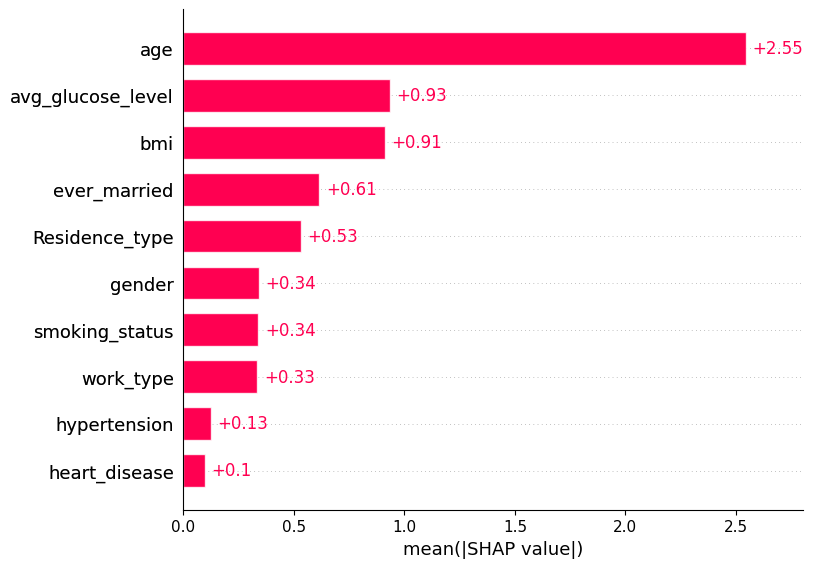

In [65]:
shap.plots.bar(shap_values, max_display=15)  # Top 15 features

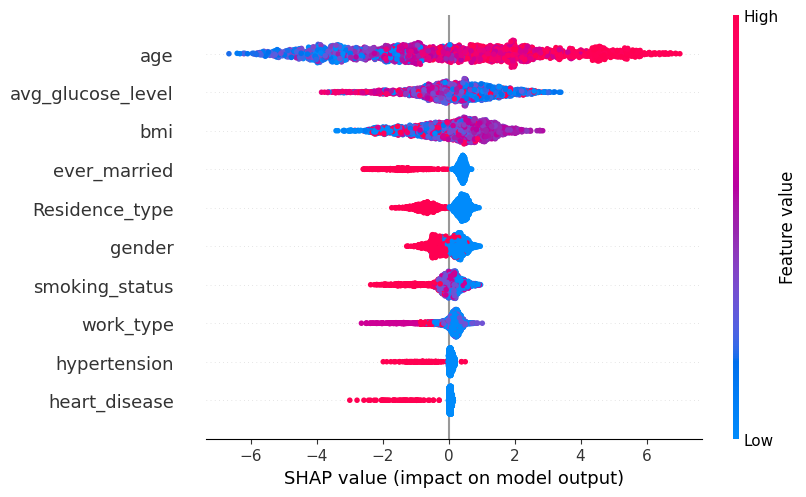

In [66]:
shap.plots.beeswarm(shap_values, max_display=15)


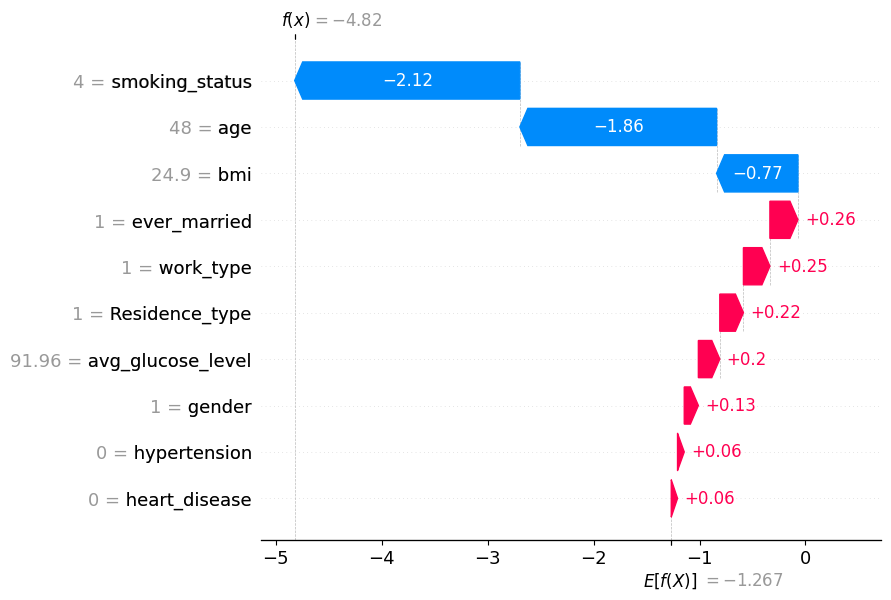

In [67]:
# Explain the first test instance
shap.plots.waterfall(shap_values[0])


In [68]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])
